# Problem 1.5

## (a) Preparing the training data

In [1]:
#Problem 1.5 getting the training and test data set
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 

#generate a data set of 100. 
#for simplicity, 50 in the first quadrant, another 50 in the third quadrant 
train_X1 = []
train_Y1 = []
train_X2 = []
train_Y2 = []

for i in range(50):
    train_X1.append(random.uniform(0,1))
    train_Y1.append(random.uniform(0,1))
    train_X2.append(random.uniform(-1,0))
    train_Y2.append(random.uniform(-1,0))
    
#label the data
train_data1 = [np.array([1,train_X1[i],train_Y1[i],1]) for i in range(50)]
train_data2 = [np.array([1,train_X2[i],train_Y2[i],-1]) for i in range(50)]
train_data = train_data1 + train_data2

## (a) Preparing the test data

In [2]:
#generate a test data set of 10000. 
#for simplicity, 5000 in the first quadrant, another 10 in the third quadrant 
test_X1 = []
test_Y1 = []
test_X2 = []
test_Y2 = []

for i in range(5000):
    test_X1.append(random.uniform(0,1))
    test_Y1.append(random.uniform(0,1))
    test_X2.append(random.uniform(-1,0))
    test_Y2.append(random.uniform(-1,0))
    
#label the data
test_data1 = [np.array([1,test_X1[i],test_Y1[i],1]) for i in range(5000)]
test_data2 = [np.array([1,test_X2[i],test_Y2[i],-1]) for i in range(5000)]
test_data = test_data1 + test_data2

## (a) Developed the variation of Adaline Algorithm

In [5]:
#Problem 1.5 variation of Adaline perceptron learning algorithm
class Perceptron(object):
    def __init__(self, data, learning_rate=100):
        self.W = np.zeros(len(data[0:3]))
        self.update = 0
        self.learning_rate = learning_rate
    
    def predict(self, x):
        #activation = np.dot(self.W.T,x)
        #return np.sign(activation)
        return np.dot(self.W.T,x)
    
    def getErrorRate(self, test_data):
        X = np.array(test_data)[:,0:3]
        d = np.array(test_data)[:, 3:4]
        errorCount = 0
        for i in range(len(test_data)):
            predicted_value = self.predict(X[i])
            expected_value = d[i]
            if expected_value != predicted_value:
                errorCount += 1
        return (errorCount)/len(test_data)*100
                
    
    
    def fit(self, data):
        count = 0
        X = np.array(data)[:,0:3]
        d = np.array(data)[:, 3:4]
        while self.update < 1000:
            for i in range(len(data)):
                predicted_value_y = self.predict(X[i])
                expected_value = d[i]
                if expected_value * predicted_value_y <=1:
                    self.W = self.W + self.learning_rate*(expected_value - predicted_value_y) * X[i]
                    self.update += 1
        #if self.update == 1000:
        print("Number of iterations for converging:", self.update)


## (a) Running the algorithm for learning rate = 100

In [4]:
#Problem 1.5 a)

perceptron = Perceptron(train_data)
perceptron.fit(train_data)
print("Final weight vector:",perceptron.W)
print("Error rate on test data with learning rate {0}:{1}".format(100,perceptron.getErrorRate(test_data)))


/Users/venkateshdevale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in multiply


KeyboardInterrupt: 

## Plotting with learning rate = 100

In [ ]:
#Plotting on training data
plt.plot(train_X1, train_Y1, 'bo')
plt.plot(train_X2, train_Y2, 'ro')
x = np.linspace(-1,1)
#plt.plot(x, -x, color='green', linestyle='-')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-')
#plt.axis([-1, 1, -1, 1])
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

## (b) Running the algorithm for learning rate = 1

In [11]:
#Problem 1.5 b)
perceptron = Perceptron(train_data, 1)
perceptron.fit(train_data)
print("Final weight vector:",perceptron.W)
print("Error rate on test data with learning rate {0}:{1}".format(1,perceptron.getErrorRate(test_data)))

Number of iterations for converging: 1001
Final weight vector: [0.43672224 6.47433681 5.73521961]
Error rate on test data with learning rate 1:100.0


## Plotting with learning rate = 1

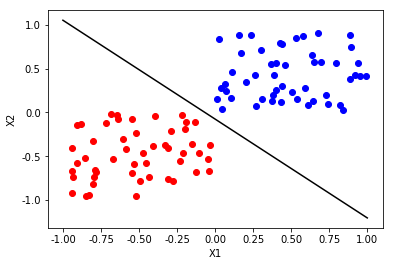

In [12]:
#Plotting on training data
plt.plot(train_X1, train_Y1, 'bo')
plt.plot(train_X2, train_Y2, 'ro')
x = np.linspace(-1,1)
#plt.plot(x, -x, color='green', linestyle='-')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-')
#plt.axis([-1, 1, -1, 1])
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

## (c) Running the algorithm for learning rate = 0.01

In [9]:
#Problem 1.5 c)
perceptron = Perceptron(train_data, 0.01)
perceptron.fit(train_data)
print("Final weight vector:",perceptron.W)
print("Error rate on test data with learning rate {0}:{1}".format(0.01,perceptron.getErrorRate(test_data)))

Number of iterations for converging: 1034
Final weight vector: [0.00784409 1.37736153 1.30760402]
Error rate on test data with learning rate 0.01:100.0


## Plotting with learning rate = 0.01

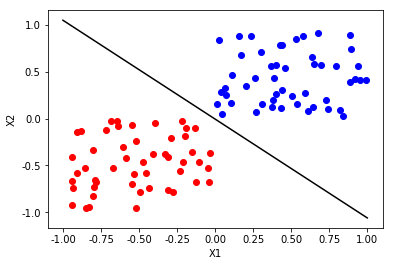

In [10]:
#Plotting on training data
plt.plot(train_X1, train_Y1, 'bo')
plt.plot(train_X2, train_Y2, 'ro')
x = np.linspace(-1,1)
#plt.plot(x, -x, color='green', linestyle='-')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-')
#plt.axis([-1, 1, -1, 1])
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

## Plotting test data for learning rate 0.01 which is considered to be the optimum

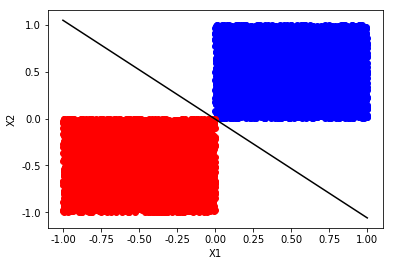

In [8]:
#Plotting on testing data
plt.plot(test_X1, test_Y1, 'bo')
plt.plot(test_X2, test_Y2, 'ro')
#x = np.linspace(-1,1)
#plt.plot(x, -x, color='green', linestyle='-')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-')
#plt.axis([-1, 1, -1, 1])
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

## (d) Running the algorithm for learning rate = 0.0001

In [13]:
#Problem 1.5 d)
perceptron = Perceptron(train_data, 0.0001)
perceptron.fit(train_data)
print("Final weight vector:",perceptron.W)
print("Error rate on test data with learning rate {0}:{1}".format(0.001,perceptron.getErrorRate(test_data)))


Number of iterations for converging: 1000
Final weight vector: [-3.93128390e-05  4.86304469e-02  4.36446761e-02]
Error rate on test data with learning rate 0.001:100.0


## Plotting with learning rate = 0.0001

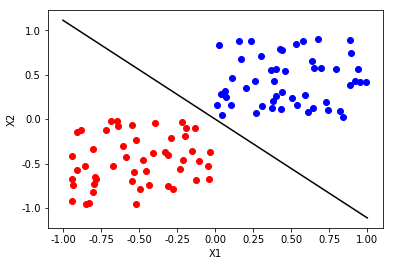

In [14]:
#Plotting on training data
plt.plot(train_X1, train_Y1, 'bo')
plt.plot(train_X2, train_Y2, 'ro')
x = np.linspace(-1,1)
#plt.plot(x, -x, color='green', linestyle='-')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-')
#plt.axis([-1, 1, -1, 1])
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

## (e)

### There is no difference here due the nature of the data as already confirmed with professor for my case hence we are getting the error rate percent with various learning rates as same, but generally this learning rate should be not too low and not too high to correctly converge the weight vector